# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [75]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [76]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ponta do sol
Processing Record 2 of Set 1 | pochutla
Processing Record 3 of Set 1 | lavrentiya
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | yar-sale
Processing Record 8 of Set 1 | rocha
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | fomboni
Processing Record 12 of Set 1 | byron bay
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | makakilo city
Processing Record 18 of Set 1 | nanortalik
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | okhotsk
Processing Record 21 of Set 1 | santiago
Processing Record 22 of Set 1 | thompson
Proce

In [77]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [78]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ponta do sol,32.6667,-17.1000,19.35,72,0,3.57,PT,1681156245
1,pochutla,15.7432,-96.4661,33.23,43,28,5.29,MX,1681156245
2,lavrentiya,65.5833,-171.0000,-24.76,85,30,0.93,RU,1681156246
3,butaritari,3.0707,172.7902,27.17,82,91,5.80,KI,1681156246
4,castro,-24.7911,-50.0119,20.65,74,39,2.04,BR,1681156246


In [79]:
# Export the City_Data into a csv
city_data_df.to_csv("../cities.csv", index_label="City_ID")

In [80]:
# Read saved data
city_data_df = pd.read_csv("../cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ponta do sol,32.6667,-17.1000,19.35,72,0,3.57,PT,1681156245
1,pochutla,15.7432,-96.4661,33.23,43,28,5.29,MX,1681156245
2,lavrentiya,65.5833,-171.0000,-24.76,85,30,0.93,RU,1681156246
3,butaritari,3.0707,172.7902,27.17,82,91,5.80,KI,1681156246
4,castro,-24.7911,-50.0119,20.65,74,39,2.04,BR,1681156246


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

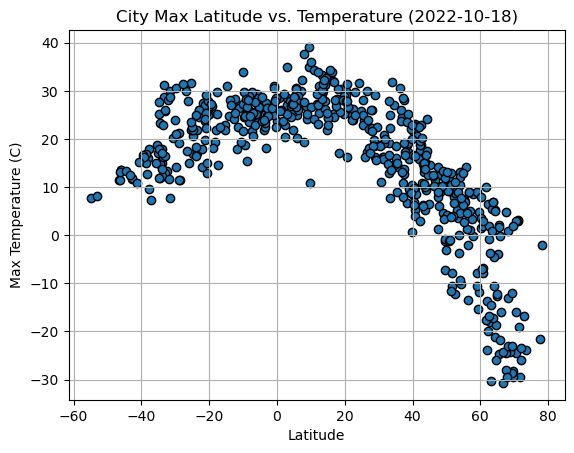

In [81]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("../Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

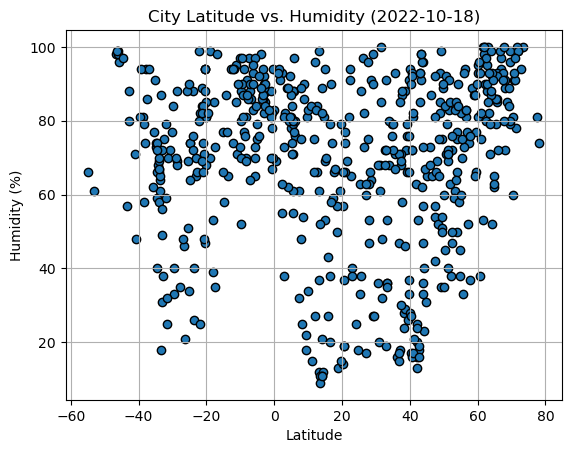

In [82]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("../Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

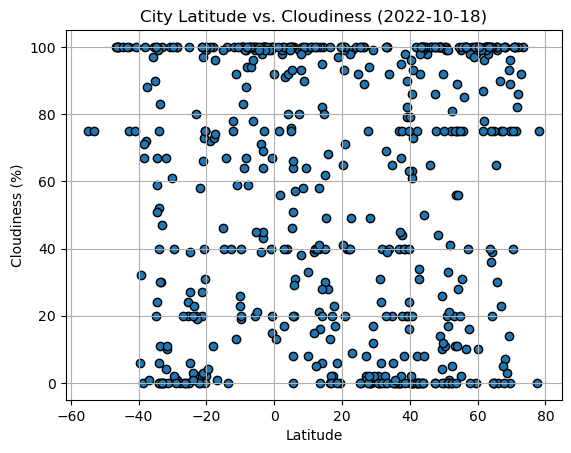

In [83]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("../Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

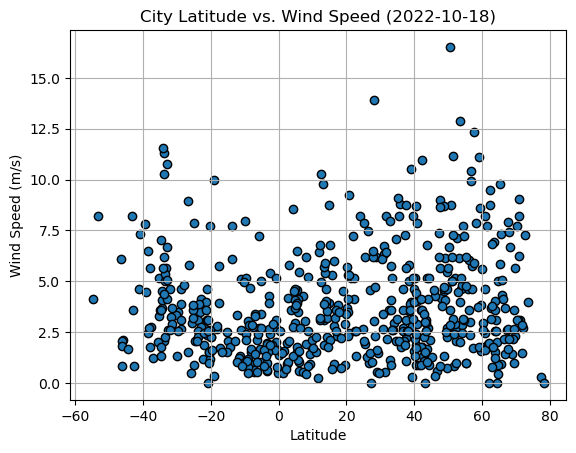

In [84]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("../Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [85]:
# Define a function to create Linear Regression plots (Generalize)

def create_lin_plots(df, x_col, y_col): 
    x_values = df[x_col]
    y_values = df[y_col]
    model = st.linregress(x_values, y_values)
    
    slope = model[0]
    intercept = model[1]
    regress_values = x_values * slope + intercept
    
    line_eq = f"y + {round(slope,2)} + x + {round(intercept,2)}"
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"red")
    #plt.annotate(line_eq,fontsize=15,color="red")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()
    
    print(f"The r-value is: {model[2]}")

In [86]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ponta do sol,32.6667,-17.1000,19.35,72,0,3.57,PT,1681156245
1,pochutla,15.7432,-96.4661,33.23,43,28,5.29,MX,1681156245
2,lavrentiya,65.5833,-171.0000,-24.76,85,30,0.93,RU,1681156246
3,butaritari,3.0707,172.7902,27.17,82,91,5.80,KI,1681156246
5,jamestown,42.0970,-79.2353,17.80,16,0,3.60,US,1681156246


In [87]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,castro,-24.7911,-50.0119,20.65,74,39,2.04,BR,1681156246
7,rocha,-34.4833,-54.3333,23.37,59,24,3.68,UY,1681156166
9,rikitea,-23.1203,-134.9692,24.62,70,80,3.47,PF,1681156247
10,fomboni,-12.2800,43.7425,28.27,74,78,3.33,KM,1681156247
11,byron bay,-28.6500,153.6167,11.51,69,1,2.64,AU,1681156248


###  Temperature vs. Latitude Linear Regression Plot

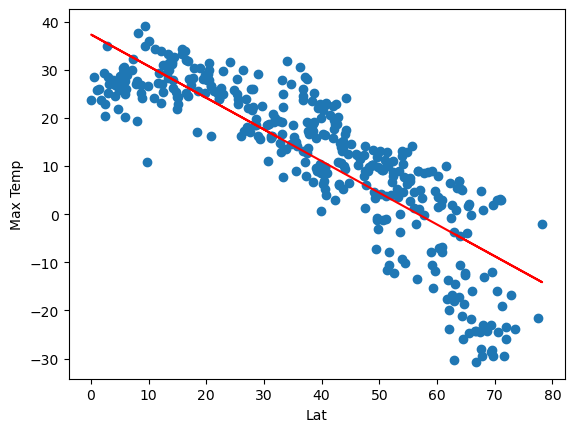

The r-value is: -0.848883851882282


In [88]:
# Linear regression on Northern Hemisphere
create_lin_plots(northern_hemi_df, 'Lat', 'Max Temp') 

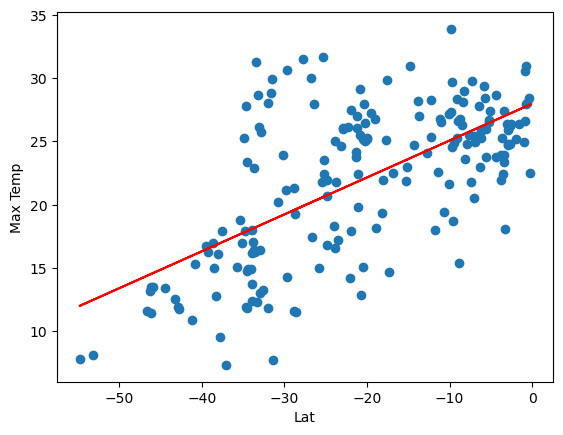

The r-value is: 0.6433973833118821


In [89]:
# Linear regression on Southern Hemisphere
create_lin_plots(southern_hemi_df, 'Lat', 'Max Temp') 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

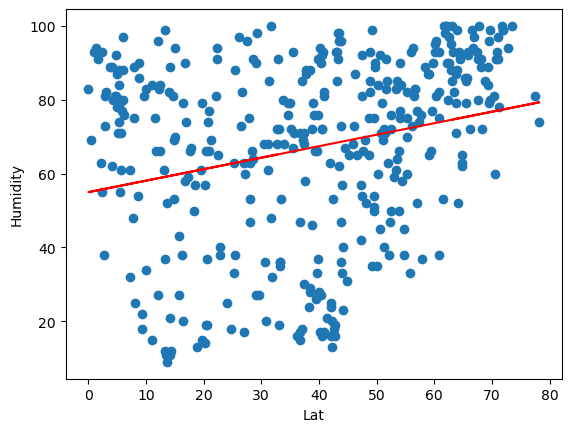

The r-value is: 0.25665420316984533


In [90]:
# Northern Hemisphere
create_lin_plots(northern_hemi_df,'Lat','Humidity') 

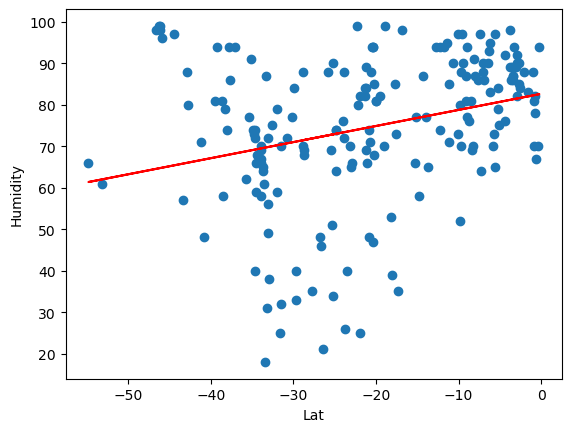

The r-value is: 0.2867445986860151


In [91]:
# Southern Hemisphere
create_lin_plots(southern_hemi_df, 'Lat','Humidity') 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

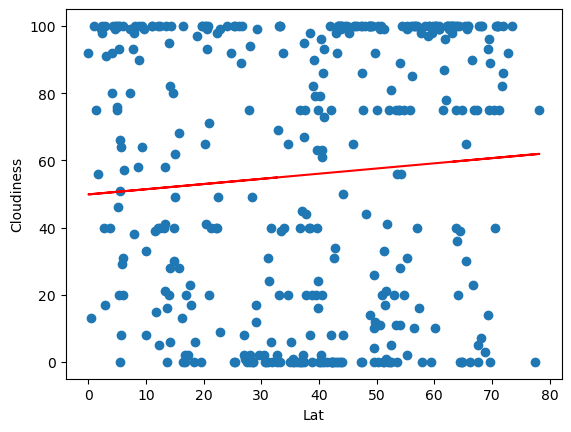

The r-value is: 0.07833300888793077


In [92]:
# Northern Hemisphere
create_lin_plots(northern_hemi_df, 'Lat','Cloudiness')

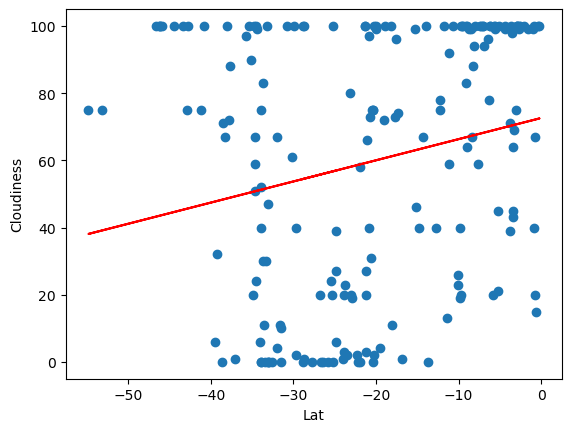

The r-value is: 0.21586836551978283


In [93]:
# Southern Hemisphere
create_lin_plots(southern_hemi_df, 'Lat','Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

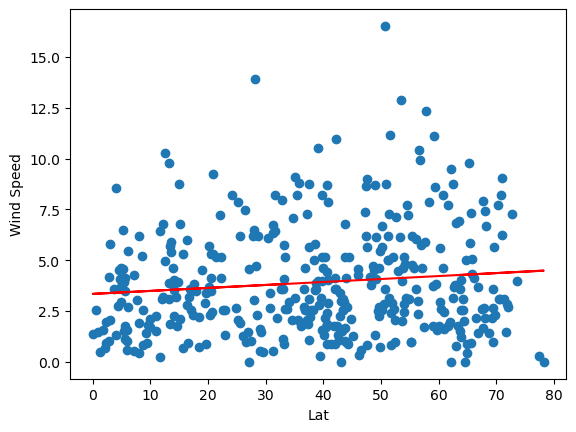

The r-value is: 0.11281586793111575


In [94]:
# Northern Hemisphere
create_lin_plots(northern_hemi_df, 'Lat','Wind Speed')

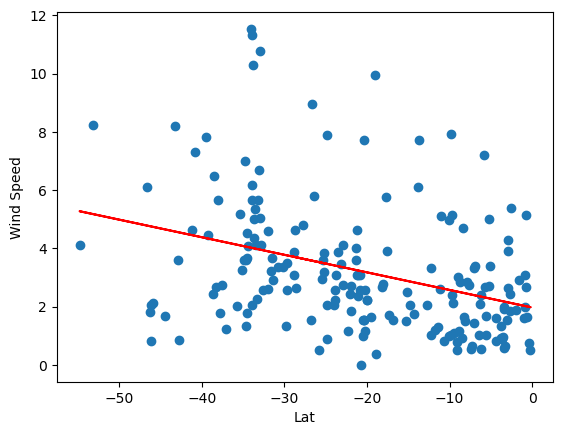

The r-value is: -0.35752061077792835


In [95]:
# Southern Hemisphere
create_lin_plots(southern_hemi_df, 'Lat','Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE